Read the dataset, store the following :
- the player actions in a matrix 
- the distinct possible actions in an array
- the nb of players (indistinct)

In [1]:
from csv import reader
def read_dataset(file_name):
    player_actions = []
    distinct_actions = []
    nb_players = 0
    with open(file_name, 'r') as read_obj:
        # pass the file object to reader() to get the reader object
        csv_reader = reader(read_obj)
        # Iterate over each row in the csv using reader object
        for row in csv_reader:
            nb_players += 1
            player_actions.append(row)
            for action in row:
                #Appending actions that are not {player_id, timemarker}
                if action[0] != 't' and action[:4] != 'http' and action not in distinct_actions:
                    distinct_actions.append(action)
    return player_actions, distinct_actions, nb_players
                    
player_actions, distinct_actions, nb_players = read_dataset('TRAIN.csv')

In [2]:
print(nb_players)

3052


In [3]:
print(distinct_actions)

['Protoss', 'Base', 's', 'hotkey30', 'hotkey00', 'hotkey32', 'SingleMineral', 'hotkey10', 'hotkey40', 'hotkey42', 'hotkey20', 'hotkey22', 'hotkey12', 'hotkey50', 'hotkey52', 'hotkey70', 'hotkey60', 'hotkey62', 'hotkey90', 'hotkey02', 'hotkey80', 'hotkey82', 'hotkey92', 'hotkey11', 'hotkey72', 'Terran', 'Zerg', 'hotkey41', 'hotkey21', 'hotkey61', 'hotkey31', 'hotkey51', 'hotkey01', 'hotkey71', 'hotkey81', 'hotkey91']


In [4]:
[print(player_actions[i]) for i in range(3)]

['http://eu.battle.net/sc2/en/profile/4234852/1/First/', 'Protoss', 'Base', 's', 's', 's', 's', 's', 't5', 'Base', 's', 'hotkey30', 'hotkey00', 't10', 't15', 't20', 't25', 't30', 't35', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 't40', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 't45', 'hotkey32', 'SingleMineral', 's', 't50', 's', 'hotkey32', 's', 'hotkey32', 't55', 's', 'hotkey32', 's', 't60', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 't65', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 't70', 's', 'hotkey32', 's', 'hotkey32', 's', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 't75', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 't80', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 's', 'hotkey32', 't85', 's', 'hotkey32', 's', 'hotkey32', 's'

[None, None, None]

On cherche à créer un dictionnaire de la forme suivante : 

    {'player_id': ['http...','http...'],'Base':[60,80,...],'s':[600,860,...],...} 

où les clés sont les actions possibles dans le jeu (+une clé pour l'id) et les valeurs (à l'exception du player_id) sont un count de ces actions pour chaque joueur du dataset.

In [5]:
def create_count_dict(is_training_set, nb_players, distinct_actions):
    count_dict = {}
    #If it's the training set, add a key for the player's ID
    if is_training_set:
        count_dict['player_id'] = []
    #Add each distinct action as a key
    for action in distinct_actions:
        count_dict[action] = [0] * nb_players
    return count_dict

In [6]:
def fill_count_dict(is_training_set, count_dict, player_actions):
    for idx,player in enumerate(player_actions):
        #If it's the training set, append the player_ids
        if is_training_set:
            count_dict['player_id'].append(player[0])
            #Compute the count values for each action of each player
            for action in player[1:]:
                #Ignore the timemarkers (e.g t10, t15)
                if action[0] != 't':
                    count_dict[action][idx] += 1    
        
        #If it's the test set
        else:
            #Same computation as in the first if clause, except we don't skip the first column, cause it contains actions, not ids
            for action in player:
                #Ignore the timemarkers (e.g t10, t15)
                if action[0] != 't':
                    count_dict[action][idx] += 1              

In [7]:
count_dict = create_count_dict(True, nb_players, distinct_actions)
fill_count_dict(True, count_dict, player_actions) 
print(count_dict)

{'player_id': ['http://eu.battle.net/sc2/en/profile/4234852/1/First/', 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/', 'http://eu.battle.net/sc2/en/profile/4234852/1/First/', 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/', 'http://eu.battle.net/sc2/en/profile/4234852/1/First/', 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/', 'http://eu.battle.net/sc2/en/profile/4234852/1/First/', 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/', 'http://eu.battle.net/sc2/en/profile/3401218/1/Welmu/', 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/', 'http://eu.battle.net/sc2/en/profile/3401218/1/Welmu/', 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/', 'http://eu.battle.net/sc2/en/profile/3401218/1/Welmu/', 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/', 'http://eu.battle.net/sc2/en/profile/3538115/1/Golden/', 'http://eu.battle.net/sc2/en/profile/250458/1/VortiX/', 'http://eu.battle.net/sc2/en/profile/3538115/1/Golden/', 'http://eu.ba

At this point we can  convert our dictionary into a pandas Dataframe

In [8]:
import pandas as pd

In [9]:
count_df = pd.DataFrame(count_dict)

In [10]:
print(count_df)

                                              player_id  Protoss  Base    s  \
0     http://eu.battle.net/sc2/en/profile/4234852/1/...        1    66  674   
1     http://eu.battle.net/sc2/en/profile/3074362/1/...        1    12  538   
2     http://eu.battle.net/sc2/en/profile/4234852/1/...        1    47  430   
3     http://eu.battle.net/sc2/en/profile/3074362/1/...        1    21  397   
4     http://eu.battle.net/sc2/en/profile/4234852/1/...        1     2  208   
...                                                 ...      ...   ...  ...   
3047     http://xx.battle.net/sc2/en/profile/405/1/MMA/        0     0  572   
3048  http://xx.battle.net/sc2/en/profile/410/1/STBo...        0     0  775   
3049     http://xx.battle.net/sc2/en/profile/405/1/MMA/        0     0  900   
3050  http://xx.battle.net/sc2/en/profile/410/1/STBo...        0     0  452   
3051     http://xx.battle.net/sc2/en/profile/405/1/MMA/        0     0  397   

      hotkey30  hotkey00  hotkey32  SingleMineral  

Now onto the classification model. Let the fun begin

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [12]:
# Split dataset in features and target variable
X = count_df[distinct_actions] # Features
y = count_df.player_id # Target variable

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7270742358078602


Accuracy results with different parameters : 
- Attribute Selection Measure :
    1. GINI : 67%
    2. Entropy : 71%
- Max_depth : 
    - Doesn't seem to really make the accuracy higher



Now we'll try predicting the players on the actual test.csv file
(the additional t on the variables' names refers to it being the test file)

In [16]:
#Read the test set
tplayer_actions, tdistinct_actions, tnb_players = read_dataset('TEST.csv')

In [17]:
#Create the count dictionary
# CAREFUL : THE DISTINCT_ACTIONS MUST BE IN THE SAME ORDER AS IN THE TRAINING SET, CAUSE THAT'LL ULTIMATELY BE THE
# COLUMNS' ORDER IN THE DATAFRAME (so here we use distinct_actions not tdistinct_actions, after verifying they both = 36)
tcount_dict = create_count_dict(False, tnb_players, distinct_actions)
fill_count_dict(False,tcount_dict, tplayer_actions) 
print(tcount_dict)


{'Protoss': [0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [18]:
#Create the count df
tcount_df = pd.DataFrame(tcount_dict)
print(tcount_df)

     Protoss  Base     s  hotkey30  hotkey00  hotkey32  SingleMineral  \
0          0    19   848         3        14         2              3   
1          0     0   572         1         2       467              0   
2          1    20   556        60         1       251              0   
3          0    17  1588         4         0        30              2   
4          1    21   236        11         3        16              0   
..       ...   ...   ...       ...       ...       ...            ...   
335        0     0   718         3         0       506              1   
336        1   200   717         5         3       176              1   
337        0     0   412         3         0       204             27   
338        0     0   148         1         1         0              1   
339        0     0   611         6         0       257             43   

     hotkey10  hotkey40  hotkey42  ...  Zerg  hotkey41  hotkey21  hotkey61  \
0           7         0         0  ...     1 

In [19]:
#Predict the response for test dataset
players_pred = clf.predict(tcount_df)

In [20]:
print(players_pred)

['http://eu.battle.net/sc2/en/profile/3538115/1/Golden/'
 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/'
 'http://eu.battle.net/sc2/en/profile/3886231/1/OzOz/'
 'http://eu.battle.net/sc2/en/profile/250458/1/VortiX/'
 'http://kr.battle.net/sc2/en/profile/2341765/1/Billowy/'
 'http://us.battle.net/sc2/en/profile/2735594/1/coLqxc/'
 'http://eu.battle.net/sc2/en/profile/3585588/1/llllllllll/'
 'http://eu.battle.net/sc2/en/profile/884897/1/LiquidSnute/'
 'http://eu.battle.net/sc2/en/profile/2526293/1/Krr/'
 'http://eu.battle.net/sc2/en/profile/4341883/1/Patience/'
 'http://eu.battle.net/sc2/en/profile/284466/1/EGDeMusliM/'
 'http://eu.battle.net/sc2/en/profile/788178/1/Nerchio/'
 'http://eu.battle.net/sc2/en/profile/2101268/1/Stephano/'
 'http://eu.battle.net/sc2/en/profile/3880481/1/AllianceNani/'
 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/'
 'http://eu.battle.net/sc2/en/profile/3538115/1/Golden/'
 'http://eu.battle.net/sc2/en/profile/377576/1/LiquidMaNa/'
 'http://

In [21]:
#Preparing the csv submission file
with open('v3_FIRST_SUBMISSION.csv', 'w') as f:
    f.write("RowId,prediction\n")
    for i in range(len(players_pred)):
        f.write("%s,%s\n" % (i+1, players_pred[i]))

# Résultat = Score de 0.70 sur le challenge Kaggle

Next-step : Prendre en compte les timemarkers. Mais comment ? Prendre les mêmes N timemarkers précis pour tous les joueurs (e.g toutes les 30 secondes) ? Prendre tous les timemarkers ? mais à ce moment comment on les gère ?

Commençons par mieux explorer le dataset pour voir à quoi ressemble la distribution des timemarkers, est-ce que ce sont les mêmes pour tous les joueurs ou pas, combien il y en a, etc

(Les calculs d'exploration du dataset ont été faits sur un script séparé pour ne pas polluer le notebook)

Résultats :

- Les timesmarkers sont réguliers (toutes les 5 secondes)
- La distribution des timemarkers n'est pas homogène. Le premier timemarker est t5 pour tous les joueurs. Le dernier timemarker varie beaucoup (max = t5770)

Dans une première approche, on peut se dire qu'on fait ça progressivement. On commence par prendre en compte les timemarkers pour la première minute de jeu. Les colonnes ressembleraient à ça :

{'player_id': ['http...','http...'],'Base-30':[5,12,...],'s-30':[600,860,...],...} 
(30 indiquant que le count de la feature est majoré par le timemarker t30)

Question : Est-ce qu'on continue à prendre le reste des actions ou est-ce qu'on se limite aux actions timées ? Commençons par voir la précision qu'on a avec juste les actions timées puis on verra

In [22]:
def create_timed_distinct_actions(distinct_actions,timemarker):
    timed_distinct_actions = []
    for action in distinct_actions:
        timed_distinct_actions.append(action+'-'+str(timemarker))
    return timed_distinct_actions

def fill_timed_count_dict(is_training_set, count_dict, player_actions, timemarker):
    for idx,player in enumerate(player_actions):
        #If it's the training set, append the player_ids
        if is_training_set:
            count_dict['player_id'].append(player[0])
            #Compute the count values for each action of each player            
            for action in player[1:]:
                #Verify that we haven't reached the timemarker yet, if we have, we'll stop
                if action[0] == 't' and action[1:].isdigit() and int(action[1:]) >= timemarker:
                    break                
                #Ignore the timemarkers (e.g t10, t15)
                elif action[0] != 't': 
                    #Les colonnes d'action auront le format action-timemarker, e.g 'Base-30'
                    timemarked_action = action + '-' + str(timemarker)
                    count_dict[timemarked_action][idx] += 1                  
        
        #If it's the test set
        else:
            #Same computation as in the first if clause, except we don't skip the first column, cause it contains actions, not ids
            for action in player:
                #Verify that we haven't reached the timemarker yet, if we have, we'll stop
                if action[0] == 't' and action[1:].isdigit() and int(action[1:]) >= timemarker:
                    break                
                #Ignore the timemarkers (e.g t10, t15)
                elif action[0] != 't':
                    #Les colonnes d'action auront le format action-timemarker, e.g 'Base-30'
                    timemarked_action = action + '-' + str(timemarker)
                    count_dict[timemarked_action][idx] += 1

In [23]:
timed_distinct_actions = create_timed_distinct_actions(distinct_actions,60)
timed_count_dict = create_count_dict(True, nb_players, timed_distinct_actions)
fill_timed_count_dict(True, timed_count_dict, player_actions, 60) 
print(timed_count_dict)

{'player_id': ['http://eu.battle.net/sc2/en/profile/4234852/1/First/', 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/', 'http://eu.battle.net/sc2/en/profile/4234852/1/First/', 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/', 'http://eu.battle.net/sc2/en/profile/4234852/1/First/', 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/', 'http://eu.battle.net/sc2/en/profile/4234852/1/First/', 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/', 'http://eu.battle.net/sc2/en/profile/3401218/1/Welmu/', 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/', 'http://eu.battle.net/sc2/en/profile/3401218/1/Welmu/', 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/', 'http://eu.battle.net/sc2/en/profile/3401218/1/Welmu/', 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/', 'http://eu.battle.net/sc2/en/profile/3538115/1/Golden/', 'http://eu.battle.net/sc2/en/profile/250458/1/VortiX/', 'http://eu.battle.net/sc2/en/profile/3538115/1/Golden/', 'http://eu.ba

Create the pandas Dataframe

In [24]:
timed_count_df = pd.DataFrame(timed_count_dict)

In [25]:
print(timed_count_df)

                                              player_id  Protoss-60  Base-60  \
0     http://eu.battle.net/sc2/en/profile/4234852/1/...           1        2   
1     http://eu.battle.net/sc2/en/profile/3074362/1/...           1        3   
2     http://eu.battle.net/sc2/en/profile/4234852/1/...           1        2   
3     http://eu.battle.net/sc2/en/profile/3074362/1/...           1        3   
4     http://eu.battle.net/sc2/en/profile/4234852/1/...           1        2   
...                                                 ...         ...      ...   
3047     http://xx.battle.net/sc2/en/profile/405/1/MMA/           0        0   
3048  http://xx.battle.net/sc2/en/profile/410/1/STBo...           0        0   
3049     http://xx.battle.net/sc2/en/profile/405/1/MMA/           0        0   
3050  http://xx.battle.net/sc2/en/profile/410/1/STBo...           0        0   
3051     http://xx.battle.net/sc2/en/profile/405/1/MMA/           0        0   

      s-60  hotkey30-60  hotkey00-60  h

Create the new model

In [26]:
# Split dataset in features and target variable
timed_X = timed_count_df[timed_distinct_actions] # Features
timed_y = timed_count_df.player_id # Target variable

In [27]:
# Split dataset into training set and test set
timed_X_train, timed_X_test, timed_y_train, timed_y_test = train_test_split(timed_X, timed_y, test_size=0.3, random_state=1) # 70% training and 30% test

In [28]:
# Create Decision Tree classifer object
timed_clf = DecisionTreeClassifier(criterion="entropy",max_depth=15)

# Train Decision Tree Classifer
timed_clf = timed_clf.fit(timed_X_train,timed_y_train)

#Predict the response for test dataset
timed_y_pred = timed_clf.predict(timed_X_test)

In [29]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Testset:",metrics.accuracy_score(timed_y_test, timed_y_pred))
print("Accuracy Trainset:",metrics.accuracy_score(timed_y_train, timed_clf.predict(timed_X_train)))

Accuracy Testset: 0.7882096069868996
Accuracy Trainset: 0.99812734082397


Accuracy results with different parameters : 
- Timemarker :
    - t30 :
        - Attribute Selection Measure :
            1. GINI : 75%
            2. Entropy : 79%
        - Max_depth : 
            - Doesn't seem to really make the accuracy higher
    - t60, t180 :
        - almost the same results

NEW SUBMISSION WITH TIMEMARKER = 60

In [30]:
#Read the test set
tplayer_actions, tdistinct_actions, tnb_players = read_dataset('TEST.csv')
ttimed_distinct_actions = create_timed_distinct_actions(distinct_actions,60)
ttimed_count_dict = create_count_dict(False, tnb_players, ttimed_distinct_actions)
fill_timed_count_dict(False, ttimed_count_dict, tplayer_actions, 60)
ttimed_count_df = pd.DataFrame(ttimed_count_dict)
#Predict the response for test dataset
timed_players_pred = timed_clf.predict(ttimed_count_df)
print(timed_players_pred)

['http://eu.battle.net/sc2/en/profile/3538115/1/Golden/'
 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/'
 'http://eu.battle.net/sc2/en/profile/3973341/1/yoeFWSan/'
 'http://eu.battle.net/sc2/en/profile/250458/1/VortiX/'
 'http://eu.battle.net/sc2/en/profile/950504/1/Grubby/'
 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/'
 'http://eu.battle.net/sc2/en/profile/4234852/1/First/'
 'http://eu.battle.net/sc2/en/profile/884897/1/LiquidSnute/'
 'http://eu.battle.net/sc2/en/profile/2526293/1/Krr/'
 'http://eu.battle.net/sc2/en/profile/377576/1/LiquidMaNa/'
 'http://eu.battle.net/sc2/en/profile/284466/1/EGDeMusliM/'
 'http://eu.battle.net/sc2/en/profile/788178/1/Nerchio/'
 'http://eu.battle.net/sc2/en/profile/2101268/1/Stephano/'
 'http://eu.battle.net/sc2/en/profile/3973341/1/yoeFWSan/'
 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/'
 'http://eu.battle.net/sc2/en/profile/3538115/1/Golden/'
 'http://eu.battle.net/sc2/en/profile/377576/1/LiquidMaNa/'
 'http://eu.ba

In [31]:
#Preparing the csv submission file
with open('v3_SECOND_SUBMISSION.csv', 'w') as f:
    f.write("RowId,prediction\n")
    for i in range(len(timed_players_pred)):
        f.write("%s,%s\n" % (i+1, timed_players_pred[i]))

# Résultat Kaggle : 0.7970

Next-step : prendre en compte des features timées et non timées ?

On commence d'abord par une version avec plusieurs features timées, e.g :

{ player_id : ['http:...','http:...',..], 's-10':[5,7,2,...],'Base-10':[2,1,5,..],'s-30':[10,8,3,..],... }

Pour une première version on prend les markers t10,t30 et t60.

Pour ne pas polluer le notebook on n'écrira pas ces étapes de recréation d'un modèle puis entraînement
puis recréation d'un fichier de submission

NEW SUBMISSION WITH TIMEMARKERS [t10, t30, t60]

In [32]:
#INSERT CODE FOR THE [t10, t30, t60] SUBMISSIONS

# Résultat Kaggle with the [t10, t30, t60] timemarkers : 0.8235 !

Next-step : **Decision Tree Pruning**

(On garde le modèle t60 précédent, on testera par la suite pour voir si on l'améliore en prenant plusieurs timemarkers au lieu d'un seul)

Pre-pruning (avoir overfitting) : We'll look at the following parameters :
- max_leaf_nodes : Reduce the number of leaf nodes.
=> Result (t60 model) : the optimal minimum max is 450
- min_samples_leaf :  Restrict the size of sample leaf. Minimum sample size in terminal nodes can be fixed to 30, 100, 300 or 5% of total
=> Result (t60 model) : optimal = 0 (in other words not using this parameter)
- max_depth : Reduce the depth of the tree to build a generalized tree
=> Result (t60 model) : optimal max depth = 15

Pre-pruning conclusion : changing these parameters reduces the model's complexity but doesn't increase its accuracy (still 0.8)

https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/

Post-pruning : ??

First : Pre-puning with the max_depth variable and visualizing its effect on the model's accuracy

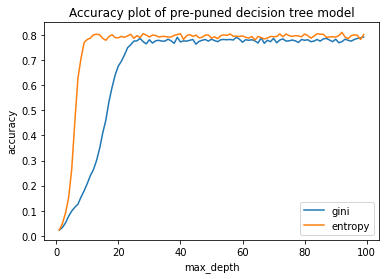

In [34]:
import matplotlib.pyplot as plt

max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,100):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(timed_X_train,timed_y_train)
    pred = dtree.predict(timed_X_test)
    acc_gini.append(metrics.accuracy_score(timed_y_test, pred))
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(timed_X_train,timed_y_train)
    pred = dtree.predict(timed_X_test)
    acc_entropy.append(metrics.accuracy_score(timed_y_test, pred))
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuracy plot of pre-puned decision tree model')
plt.legend()

On se rend compte qu'on peut prepruner à max_depth = 15 et être à l'accuracy optimale de 80%
(avis pour la suite : dans le code du modèle timed_X j'ai mis manuellement le max_depth à 15)

Second : Pruning with the Minimal Cost-Complexity (CCP)

In [35]:
path = timed_clf.cost_complexity_pruning_path(timed_X_train, timed_y_train)
alphas = path['ccp_alphas']

print(alphas)

[0.00000000e+00 6.24219725e-04 6.44870670e-04 7.46080545e-04
 7.59623712e-04 8.42172451e-04 9.12952839e-04 9.36329588e-04
 9.36329588e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.36329588e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.36329588e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.36329588e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.36329588e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.80558505e-04 1.01791094e-03 1.06023526e-03 1.09949230e-03
 1.09949230e-03 1.13641221e-03 1.18414092e-03 1.19171466e-03
 1.25654940e-03 1.25934267e-03 1.25934267e-03 1.28974134e-03
 1.28974134e-03 1.28974134e-03 1.28974134e-03 1.28974134e-03
 1.28974134e-03 1.28974134e-03 1.28974134e-03 1.28974134e-03
 1.28974134e-03 1.28974134e-03 1.28974134e-03 1.30425602e-03
 1.34399129e-03 1.34820237e-03 1.36591830e-03 1.51924742e-03
 1.51924742e-03 1.51924742e-03 1.51924742e-03 1.51924742e-03
 1.51924742e-03 1.51924742e-03 1.51924742e-03 1.51924742e-03
 1.51924742e-03 1.519247

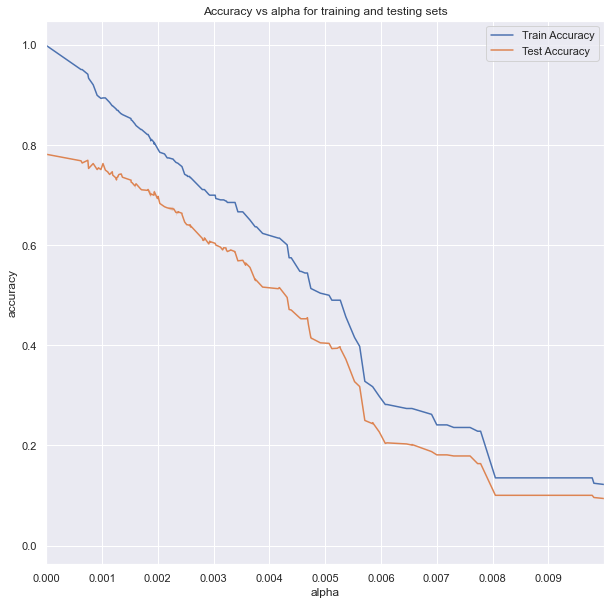

In [36]:
import seaborn as sns
import numpy as np

accuracy_train, accuracy_test = [], []

for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(timed_X_train, timed_y_train)
    y_train_pred = tree.predict(timed_X_train)
    y_test_pred = tree.predict(timed_X_test)
    
    accuracy_train.append(metrics.accuracy_score(timed_y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(timed_y_test, y_test_pred))
    
sns.set()
graph = plt.figure(figsize=(10,10))
ax = graph.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.01,0.001))
plt.gca().set_xbound(0, 0.01)
plt.show()


The resulting graph shows that the model is better off being kept at ccp_alpha = 0 
(both for the accuracy of the trainset and the accuracy of the test set)

In [ ]:
# CODE TO PRINT THE DEPTH OF THE TREE
#print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Next-step : Explorer l'utilisation de random forests

In [38]:
from sklearn.ensemble import RandomForestClassifier

t60_forest = RandomForestClassifier(max_depth=18, n_estimators = 20)
t60_forest.fit(timed_X_train, timed_y_train)
pred = t60_forest.predict(timed_X_test)
print("Accuracy Testset:",metrics.accuracy_score(timed_y_test, pred))
print("Accuracy Trainset:",metrics.accuracy_score(timed_y_train, t60_forest.predict(timed_X_train)))

Accuracy Testset: 0.8580786026200873
Accuracy Trainset: 0.9906367041198502


# OPTIMIZING THE RANDOM FOREST CLASSIFIER
The accuracy has improved to 0.86 Let's try to optimize the random forest classifier now

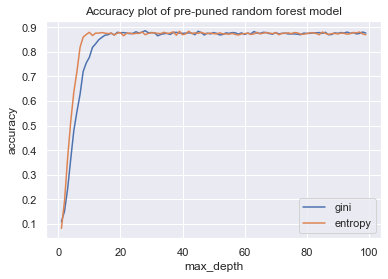

In [39]:
# Testing the following variables : max_depth (1 to 100), criterion (gini or entropy) 
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,100):
    dforest = RandomForestClassifier(criterion='gini', max_depth=i)
    dforest.fit(timed_X_train,timed_y_train)
    pred = dforest.predict(timed_X_test)
    acc_gini.append(metrics.accuracy_score(timed_y_test, pred))
    ####
    dforest = RandomForestClassifier(criterion='entropy', max_depth=i)
    dforest.fit(timed_X_train,timed_y_train)
    pred = dforest.predict(timed_X_test)
    acc_entropy.append(metrics.accuracy_score(timed_y_test, pred))
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuracy plot of pre-puned random forest model')
plt.legend()

Result : optimal max_depth = between 15 and 20, maybe 18 (plot a more zoomed graph to know with more precision)

# Testing the following variable : n_estimators (nb of trees in the forest)

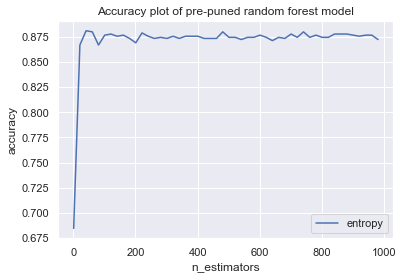

In [40]:
n_estimators = []
acc_entropy = []
for i in range(1,1000,20):
    dforest = RandomForestClassifier(criterion='entropy', n_estimators=i, max_depth=18)
    dforest.fit(timed_X_train,timed_y_train)
    pred = dforest.predict(timed_X_test)
    acc_entropy.append(metrics.accuracy_score(timed_y_test, pred))
    ####
    n_estimators.append(i)
d = pd.DataFrame({'acc_entropy':pd.Series(acc_entropy),'n_estimators':pd.Series(n_estimators)})
# visualizing changes in parameters
plt.plot('n_estimators','acc_entropy', data=d, label='entropy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Accuracy plot of pre-puned random forest model')
plt.legend()

Results : Optimal for n_estimators = 20 (20 trees per forest is enough !)

# Remarque potentiellement super importante : je teste pas toutes les variables en même temps. Par exemple j'ai commencé par testé les deux variables criterion et max_depth, et après avoir décidé du couple ('entropy',18) j'ai testé la variable n_estimators et je trouve le couple optimal (criterion, max_depth, n_estimators) = ('entropy',18,X)
# En théorie il est possible qu'un autre couple (criterion, max_depth) génère un autre n_estimators optimal et que cet autre triplet (criterion, max_depth, n_estimators) génère une meilleure accuracy que celle que j'ai trouvée.

# Quelle hypothèse je fais exactement ? -> la formuler

# New submission : 
Model description :
- Features : count of actions inside the first minute of the game
- Classifier : Random forest (max_depth = 18, n_iterators = 20, criterion = 'entropy')
# Résultat Kaggle  : 0.8647 !

In [ ]:
#Read the test set
tplayer_actions, tdistinct_actions, tnb_players = read_dataset('TEST.csv')
ttimed_distinct_actions = create_timed_distinct_actions(distinct_actions,60)
ttimed_count_dict = create_count_dict(False, tnb_players, ttimed_distinct_actions)
fill_timed_count_dict(False, ttimed_count_dict, tplayer_actions, 60)
ttimed_count_df = pd.DataFrame(ttimed_count_dict)
#Predict the response for test dataset
timed_players_pred = t60_forest.predict(ttimed_count_df)
print(timed_players_pred)

In [ ]:
#Preparing the csv submission file
with open('v3_THIRD_SUBMISSION.csv', 'w') as f:
    f.write("RowId,prediction\n")
    for i in range(len(timed_players_pred)):
        f.write("%s,%s\n" % (i+1, timed_players_pred[i]))

Possible next-step : use multiple timemarkers
# ALLER TESTONS ÇA

In [41]:
t60_distinct_actions = create_timed_distinct_actions(distinct_actions,60)
t60_count_dict = create_count_dict(True, nb_players, t60_distinct_actions)
fill_timed_count_dict(True, t60_count_dict, player_actions, 60) 

t30_distinct_actions = create_timed_distinct_actions(distinct_actions,30)
t30_count_dict = create_count_dict(True, nb_players, t30_distinct_actions)
fill_timed_count_dict(True, t30_count_dict, player_actions, 30) 

t10_distinct_actions = create_timed_distinct_actions(distinct_actions,10)
t10_count_dict = create_count_dict(True, nb_players, t10_distinct_actions)
fill_timed_count_dict(True, t10_count_dict, player_actions, 10) 

#Merge the dictionaries
t10_count_dict.update(t30_count_dict)
t10_count_dict.update(t60_count_dict)
multitimed_count_dict = t10_count_dict


In [42]:
multitimed_count_df = pd.DataFrame(multitimed_count_dict)
print(multitimed_count_df)

                                              player_id  Protoss-10  Base-10  \
0     http://eu.battle.net/sc2/en/profile/4234852/1/...           1        2   
1     http://eu.battle.net/sc2/en/profile/3074362/1/...           1        3   
2     http://eu.battle.net/sc2/en/profile/4234852/1/...           1        2   
3     http://eu.battle.net/sc2/en/profile/3074362/1/...           1        3   
4     http://eu.battle.net/sc2/en/profile/4234852/1/...           1        2   
...                                                 ...         ...      ...   
3047     http://xx.battle.net/sc2/en/profile/405/1/MMA/           0        0   
3048  http://xx.battle.net/sc2/en/profile/410/1/STBo...           0        0   
3049     http://xx.battle.net/sc2/en/profile/405/1/MMA/           0        0   
3050  http://xx.battle.net/sc2/en/profile/410/1/STBo...           0        0   
3051     http://xx.battle.net/sc2/en/profile/405/1/MMA/           0        0   

      s-10  hotkey30-10  hotkey00-10  h

In [43]:
df_columns = list(multitimed_count_df)
print(df_columns)

['player_id', 'Protoss-10', 'Base-10', 's-10', 'hotkey30-10', 'hotkey00-10', 'hotkey32-10', 'SingleMineral-10', 'hotkey10-10', 'hotkey40-10', 'hotkey42-10', 'hotkey20-10', 'hotkey22-10', 'hotkey12-10', 'hotkey50-10', 'hotkey52-10', 'hotkey70-10', 'hotkey60-10', 'hotkey62-10', 'hotkey90-10', 'hotkey02-10', 'hotkey80-10', 'hotkey82-10', 'hotkey92-10', 'hotkey11-10', 'hotkey72-10', 'Terran-10', 'Zerg-10', 'hotkey41-10', 'hotkey21-10', 'hotkey61-10', 'hotkey31-10', 'hotkey51-10', 'hotkey01-10', 'hotkey71-10', 'hotkey81-10', 'hotkey91-10', 'Protoss-30', 'Base-30', 's-30', 'hotkey30-30', 'hotkey00-30', 'hotkey32-30', 'SingleMineral-30', 'hotkey10-30', 'hotkey40-30', 'hotkey42-30', 'hotkey20-30', 'hotkey22-30', 'hotkey12-30', 'hotkey50-30', 'hotkey52-30', 'hotkey70-30', 'hotkey60-30', 'hotkey62-30', 'hotkey90-30', 'hotkey02-30', 'hotkey80-30', 'hotkey82-30', 'hotkey92-30', 'hotkey11-30', 'hotkey72-30', 'Terran-30', 'Zerg-30', 'hotkey41-30', 'hotkey21-30', 'hotkey61-30', 'hotkey31-30', 'hotkey

In [44]:
# Split dataset in features and target variable
multitimed_distinct_actions = t10_distinct_actions + t30_distinct_actions + t60_distinct_actions
multitimed_X = multitimed_count_df[multitimed_distinct_actions] # Features
multitimed_y = multitimed_count_df.player_id # Target variable

# Split dataset into training set and test set
multitimed_X_train, multitimed_X_test, multitimed_y_train, multitimed_y_test = train_test_split(multitimed_X, multitimed_y, test_size=0.3, random_state=1) # 70% training and 30% test

In [45]:
#Create the random forest model
multitimed_forest = RandomForestClassifier(max_depth=18, n_estimators = 20)
multitimed_forest.fit(multitimed_X_train, multitimed_y_train)
pred = multitimed_forest.predict(multitimed_X_test)
print("Accuracy Testset:",metrics.accuracy_score(multitimed_y_test, pred))
print("Accuracy Trainset:",metrics.accuracy_score(multitimed_y_train, multitimed_forest.predict(multitimed_X_train)))

Accuracy Testset: 0.8602620087336245
Accuracy Trainset: 0.9939138576779026


Pas d'amélioration de l'accuracy. 
2 hypothèses :
- Soit la multiplication des timemarkers est inutile
- Soit les paramètres optimaux du modèle pour plusieurs timemarkers ne sont pas les mêmes que pour un seul timemarker (t60)

La deuxième hypothèse tient pas vraiment la route parce que même si les paramètres sont pas opti, on a vu qu'ils amélioraient pas la perf, ils réduisaient juste la complexité

Next-step : Better study the dataset (cf messages discord)

Next-step : Imbalanced classes

Next-step : Cross-validation

Next-step : Mettre un Table of Contents dans le notebook, on s'y retrouve plus là !